In [95]:
from tensorflow import keras
from keras import layers, models, optimizers
from keras.models import Sequential, Model
from keras.layers import Dense,Input, Flatten
import tensorflow as tf

### Sequential API

In [96]:
def cria_modelo_com_sequencial_api():
    seq_model = Sequential([Flatten(input_shape=(28, 28)),
                            Dense(128, activation=tf.nn.relu),
                            Dense(10, activation='softmax')
                          ])

    return seq_model

### Functional API

In [98]:
def cria_modelo_com_functional_api():
    input_layer   = Input(shape=(28, 28))

    # empilha as camadas usando: new_layer()(previous_layer)
    flatten_layer = Flatten()(input_layer)
    first_dense   = Dense(128, activation='relu')(flatten_layer)
    output_layer  = Dense(10, activation='softmax')(first_dense)

    # declara inputs e outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)

    return func_model

/home/c-specp25-2/ra992741/Desktop/github/mo839/lab07/mo839/lib64/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


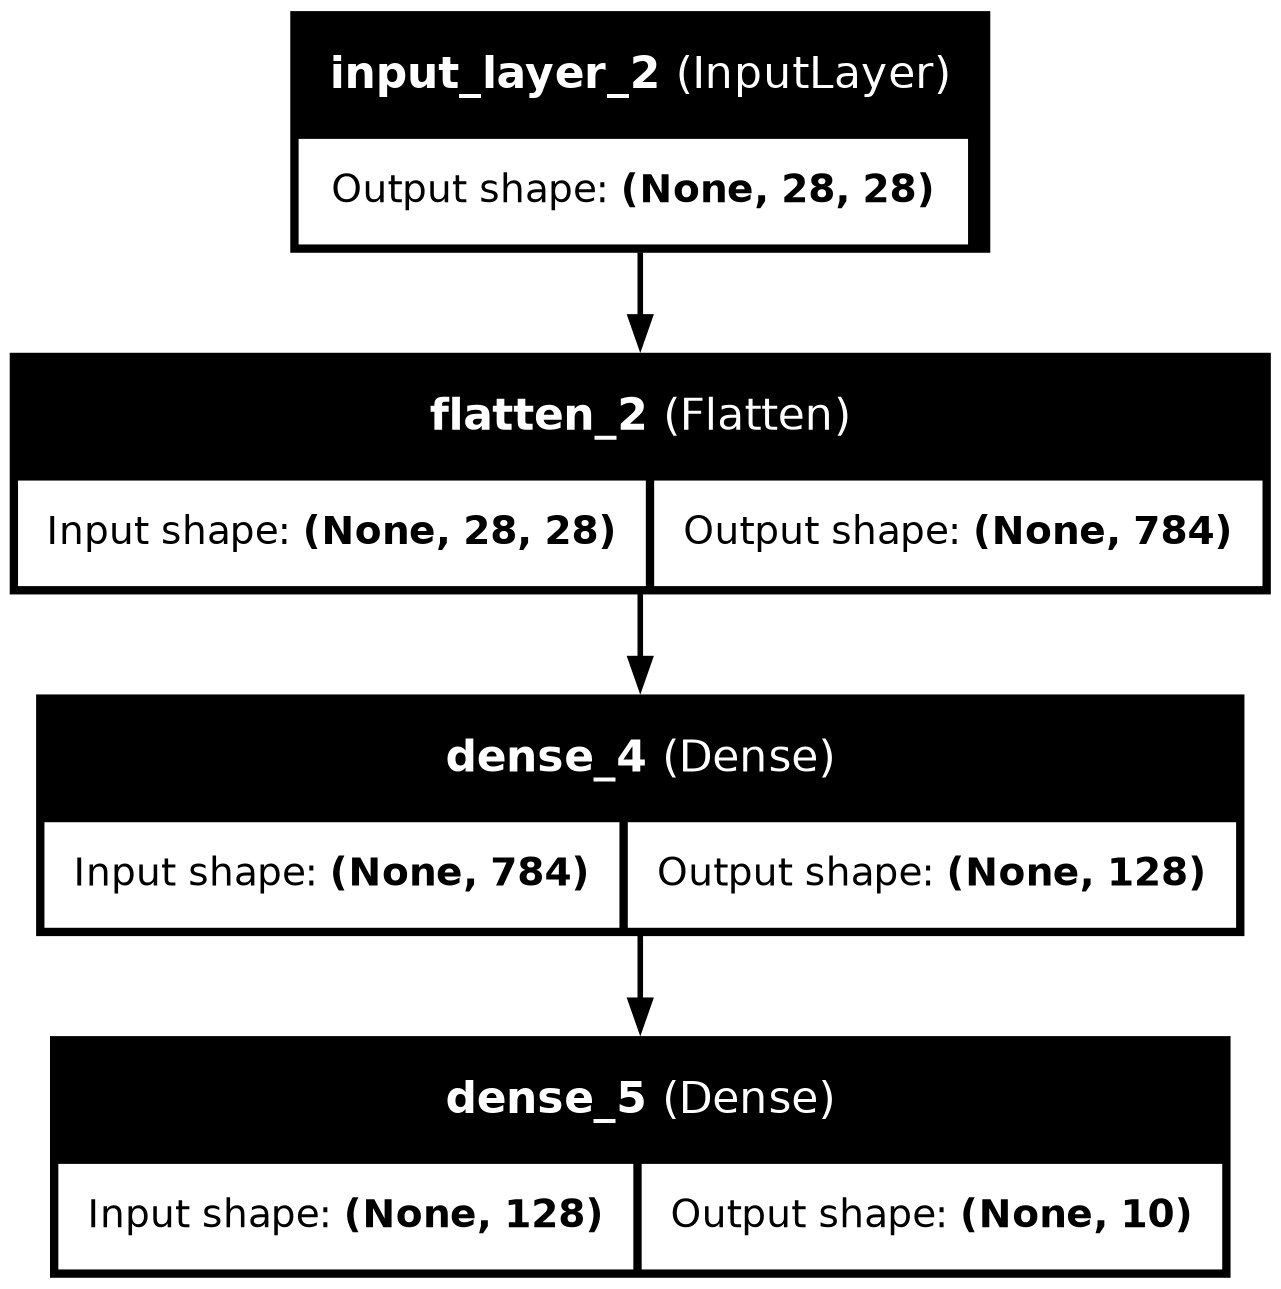

In [59]:
import pydot

m1 = cria_modelo_com_sequencial_api()
m2 = cria_modelo_com_functional_api()

tf.keras.utils.plot_model(m1, show_shapes=True, show_layer_names=True)
tf.keras.utils.plot_model(m2, show_shapes=True, show_layer_names=True)

In [60]:
#carrega dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#normaliza dados
training_images = training_images / 255.0
test_images     = test_images / 255.0

#configura modelo
modelo = cria_modelo_com_functional_api()
modelo.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#treina modelo
history = modelo.fit(training_images, training_labels, epochs=20)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8270 - loss: 0.4935
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8668 - loss: 0.3734
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8784 - loss: 0.3331
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8869 - loss: 0.3087
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8925 - loss: 0.2916
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8968 - loss: 0.2791
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9009 - loss: 0.2669
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9045 - loss: 0.2551
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9078 - loss: 0.2459
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9111 - loss: 0.2378
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9139 - loss: 0.2310
Epoch 12/20
1875/1875 ━━━━━━━━

In [99]:
import matplotlib.pyplot as plt

In [101]:
def plot_resultados_modelo(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))
  ax      = ax.flatten()

  ax[0].plot(history.history['accuracy'], label='Acurácia Treinamento', marker='o', color='blue')
  #x[0].plot(history.history['val_accuracy'], label='Acurácia Validação', marker='o', color='red', linestyle='--')

  ax[1].plot(history.history['loss'], label='Loss Treinamento', marker='o', color='blue')
#  ax[1].plot(history.history['val_loss'], label='Loss Validação', marker='o', color='red', linestyle='--')

  for _ in range(2):
      ax[_].set_xlabel('Época')
      ax[_].set_ylabel('Acurácia' if _ == 0 else 'Loss')
      ax[_].legend()
      ax[_].grid(True, linestyle=':')


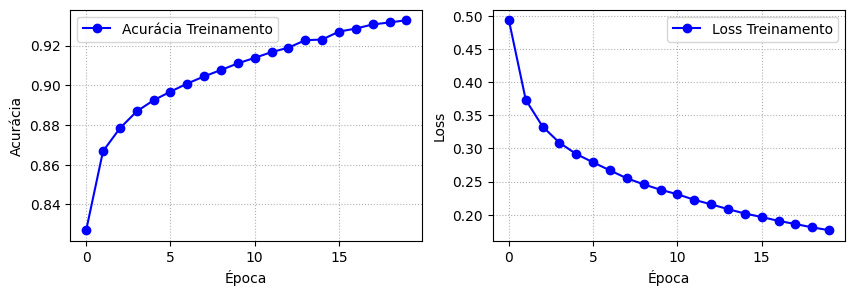

In [ ]:
plot_resultados_modelo(history)

### Modelos com Múltiplos Entradas e Saídas

In [102]:
import pandas as pd

In [103]:
data_url_red   = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data_url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Carregar o dataset
data_red             = pd.read_csv(data_url_red, delimiter=';')
data_red['classe']   = 1 
data_white           = pd.read_csv(data_url_white, delimiter=';')
data_white['classe'] = 0
data                 = pd.concat([data_red, data_white])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classe
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


### Normalizando e Separando os Dados

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar as entradas e saídas
y     = data['quality']
y_bin = data['classe']

X = data.drop(columns=['quality', 'classe'])


# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test, y_bin_train, y_bin_test = train_test_split(X, y, y_bin, test_size=0.2, random_state=42)

# Normalizar os dados
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

### Criando o Modelo

In [104]:
def cria_modelo_multiplas_saidas():
    entrada = Input(shape=(11, ))

    dense_1 = Dense(128, activation='relu')(entrada)
    dense_2 = Dense(64, activation='relu')(dense_1)

    saida_1 = Dense(1, name='qualidade')(dense_2)

    dense_3 = Dense(64, activation='relu')(dense_2)
    saida_2 = Dense(1, activation='sigmoid', name='classe')(dense_3)

    modelo_2_saidas = Model(inputs=entrada, outputs=[saida_1, saida_2])

    return modelo_2_saidas

Visualizando o Modelo

In [105]:
modelo.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 128)       │      1,536 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │      8,256 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │      4,160 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ qualidade (Dense)   │ (None, 1)         │         65 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classe (Dense)      │ (None, 1)         │         65 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,082 (55.01 KB)

 Trainable params: 14,082 (55.01 KB)

 Non-trainable params: 0 (0.00 B)

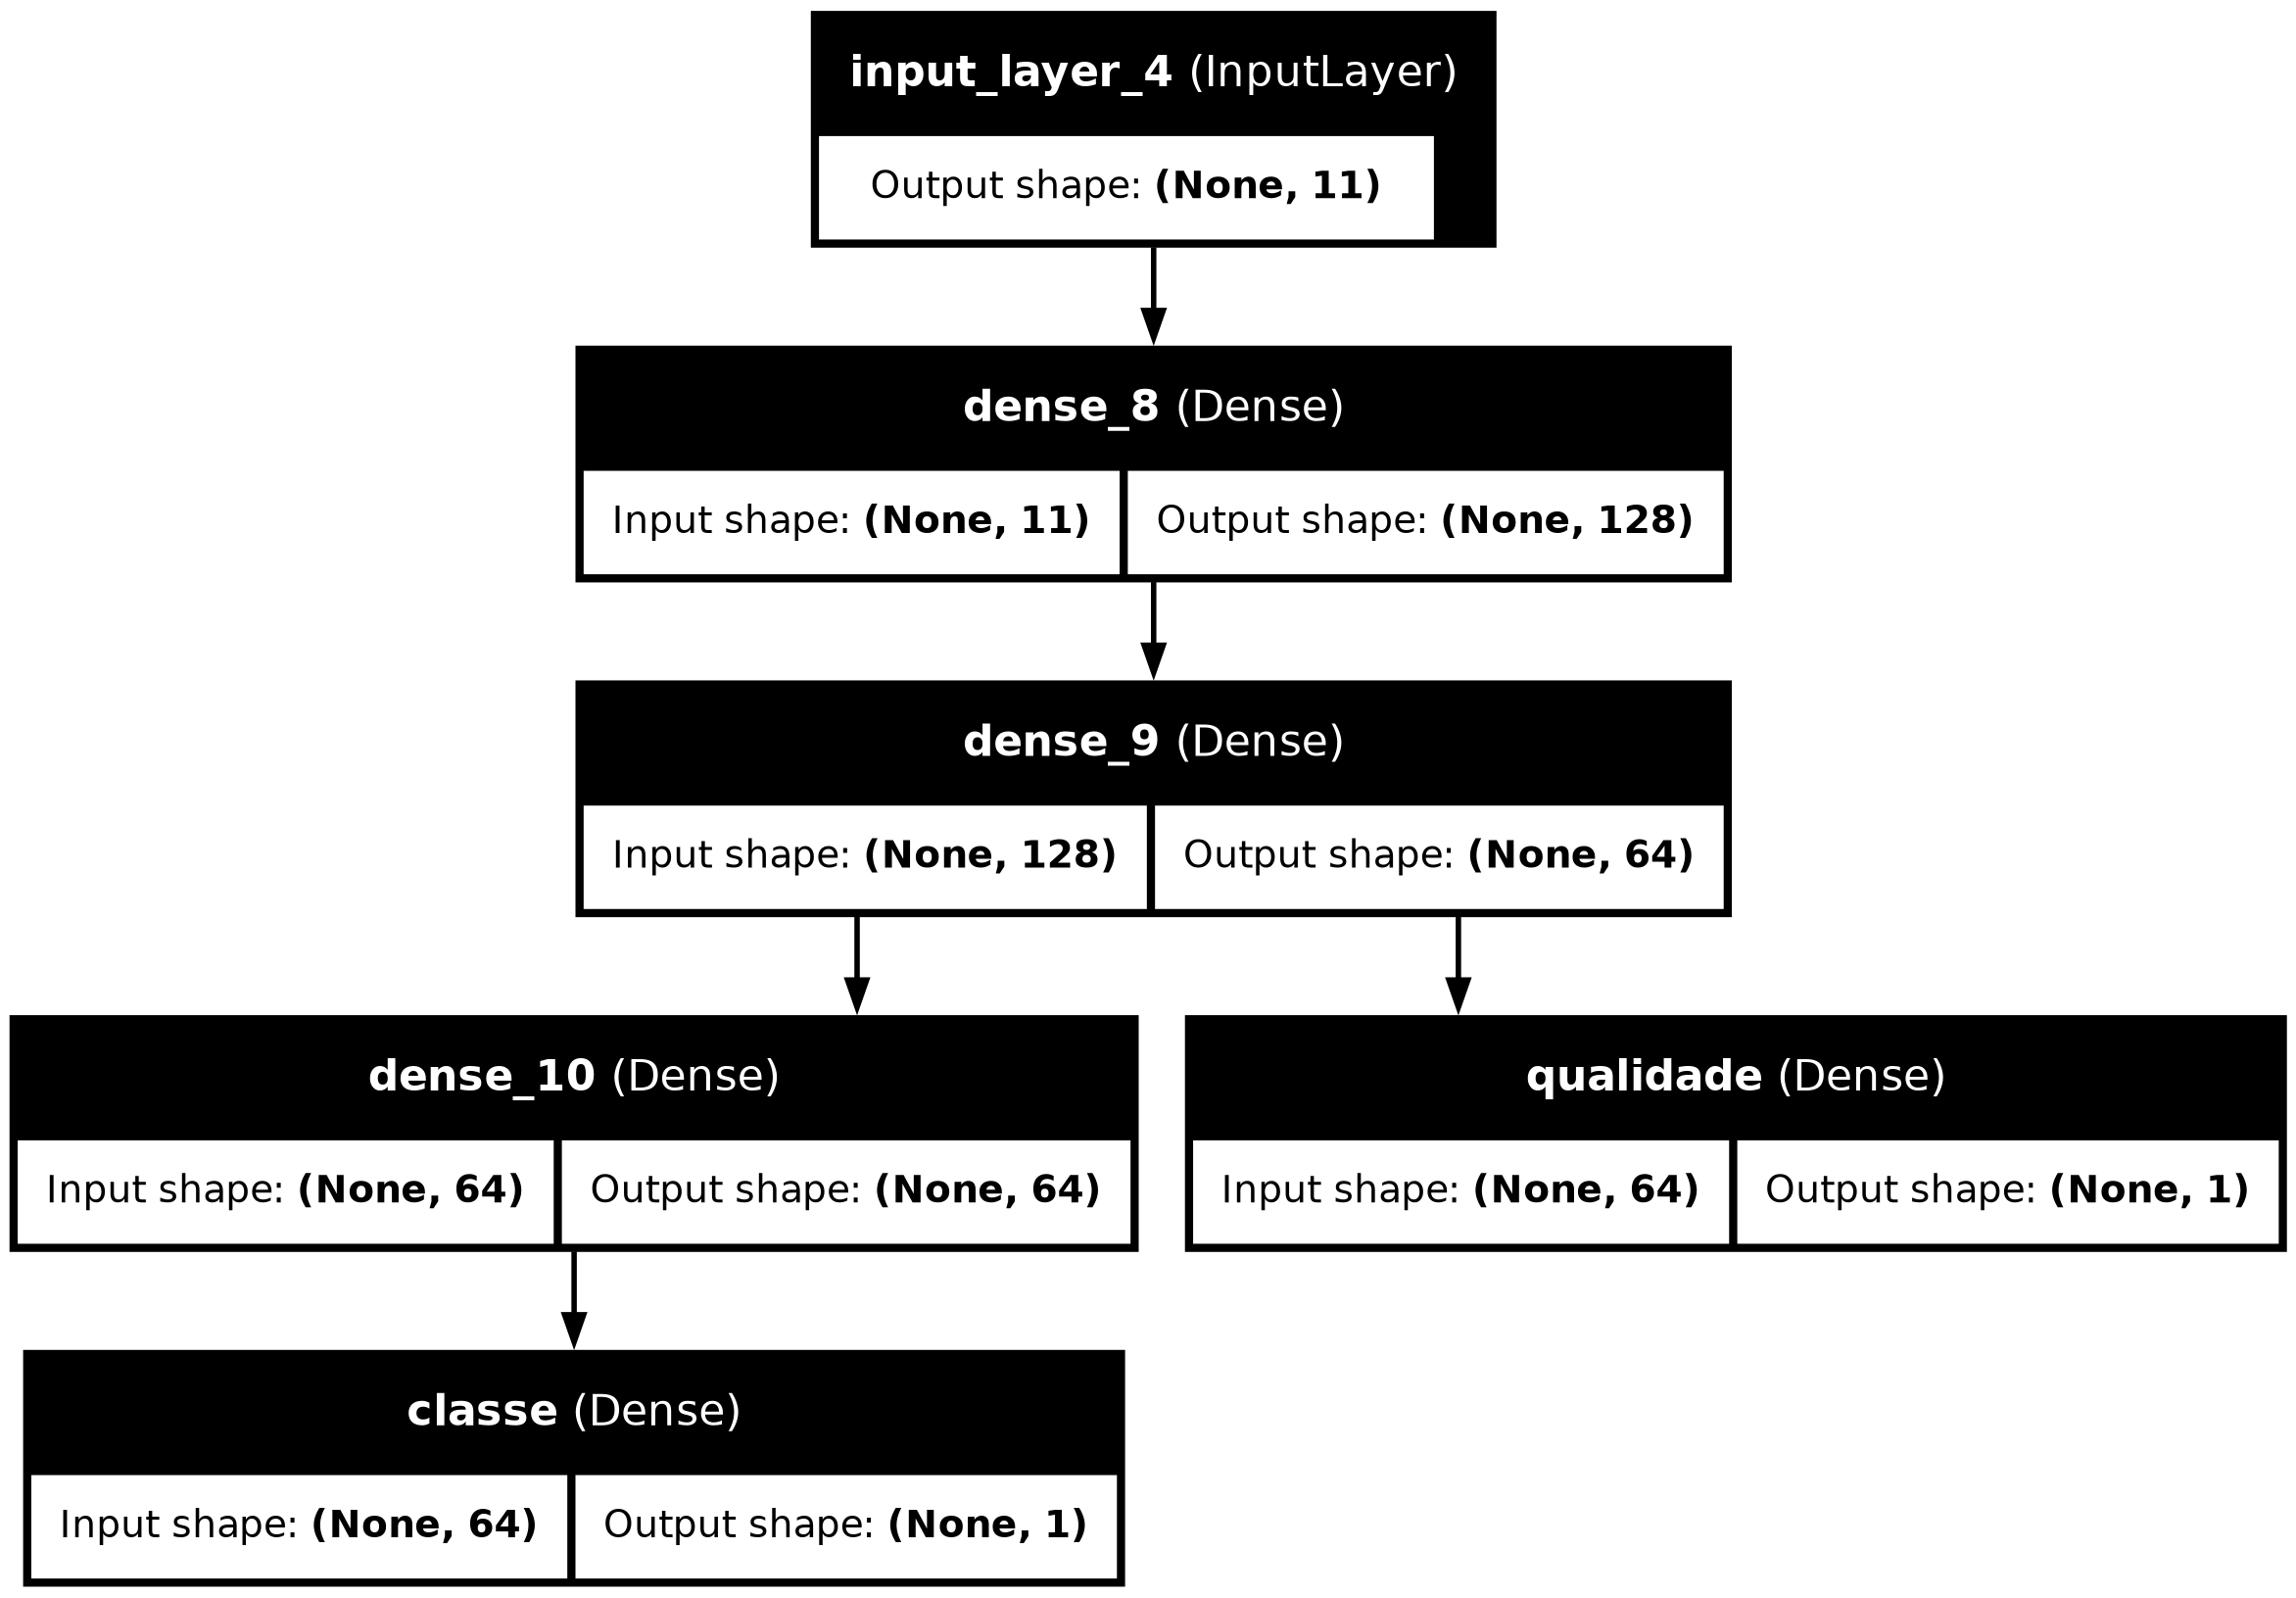

In [106]:
tf.keras.utils.plot_model(modelo, show_shapes=True, show_layer_names=True)

### Compilando o modelo

In [109]:
modelo.compile(
    optimizer='adam',
    loss={
        'qualidade': 'mse',
        'classe': 'binary_crossentropy'
    },
    metrics={
        'qualidade': 'mae',
        'classe': 'accuracy'
    }
)

In [110]:
modelo.compile()

### Treinando modelo

In [111]:
history = modelo.fit(
    X_train, {'qualidade': y_train, 'classe': y_bin_train},
    epochs=10,
    batch_size=32,
    validation_split=0.1
) 

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - classe_accuracy: 0.9910 - classe_loss: 0.0368 - loss: 1.4887 - qualidade_loss: 1.4506 - qualidade_mae: 0.9308 - val_classe_accuracy: 0.9962 - val_classe_loss: 0.0316 - val_loss: 1.1424 - val_qualidade_loss: 1.1186 - val_qualidade_mae: 0.8319
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - classe_accuracy: 0.9942 - classe_loss: 0.0291 - loss: 0.8990 - qualidade_loss: 0.8661 - qualidade_mae: 0.7240 - val_classe_accuracy: 0.9962 - val_classe_loss: 0.0277 - val_loss: 0.6847 - val_qualidade_loss: 0.6733 - val_qualidade_mae: 0.6282
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - classe_accuracy: 0.9947 - classe_loss: 0.0246 - loss: 0.6786 - qualidade_loss: 0.6516 - qualidade_mae: 0.6279 - val_classe_accuracy: 0.9962 - val_classe_loss: 0.0262 - val_loss: 0.5489 - val_qualidade_loss: 0.5278 - val_qualidade_mae: 0.5565
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - classe_accuracy: 0.9949 - classe_loss: 0.0238 - loss: 0.58

Visualizando resultados

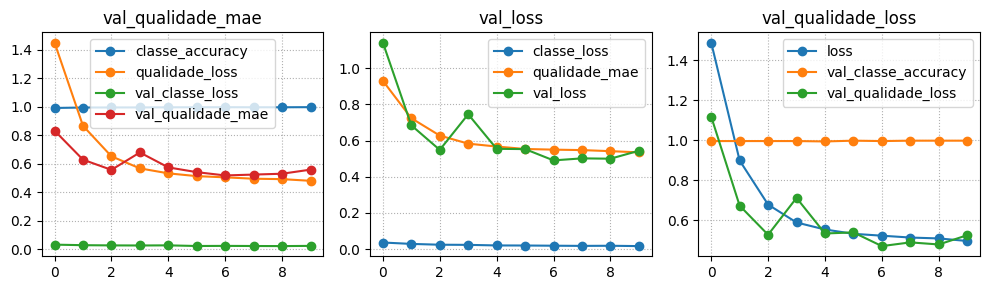

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs      = axs.flatten()

for idx, chave in enumerate(history.history.keys()):
    axs[idx%3].plot(history.history[chave], label=chave, marker='o')
    axs[idx%3].set_title(chave)
    axs[idx%3].grid(True, linestyle=':')
    axs[idx%3].legend()

plt.tight_layout()
plt.show()


### Função de Loss Personalizada

In [113]:
def calcula_loss(model, X, y_quality, y_class):
    mse_loss = tf.keras.losses.MeanSquaredError()
    binary_crossentropy_loss = tf.keras.losses.BinaryCrossentropy()

    predictions    = modelo(X)

    qualidade_loss = mse_loss(y_quality, predictions[0])
    classe_loss    = binary_crossentropy_loss(y_class, predictions[1])
    total_loss     = qualidade_loss + classe_loss

    return total_loss

### Definindo Função de Treinamento

In [114]:
def treina_modelo(modelo, X, y_qualidade, y_classe, optimizer, train_mae, train_accuracy):
    with tf.GradientTape() as tape:
        loss = calcula_loss(modelo, X, y_qualidade, y_classe)

    # Calcular os gradientes
    gradients = tape.gradient(loss, modelo.trainable_variables)

    # Atualizar os pesos
    optimizer.apply_gradients(zip(gradients, modelo.trainable_variables))

    #predict
    predictions = modelo.predict(X, verbose=0)

    train_mae.update_state(y_qualidade, predictions[0])
    train_accuracy.update_state(y_classe, predictions[1])

    return loss

### Treinando o Modelo

In [115]:
modelo         = cria_modelo_multiplas_saidas()
optimizer      = tf.keras.optimizers.Adam()
train_mae      = tf.keras.metrics.MeanAbsoluteError()
train_accuracy = tf.keras.metrics.BinaryAccuracy()

losses, accs, maes = [], [], []

epochs = 100
for epoch in range(epochs):
    train_mae.reset_state()
    train_accuracy.reset_state()

    loss = treina_modelo(modelo, X_train, y_train, y_bin_train, optimizer, train_mae, train_accuracy)
    losses.append(loss.numpy())
    accs.append(train_accuracy.result().numpy())
    maes.append(train_mae.result().numpy())
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy()}, MAE {train_mae.result().numpy()}, Accuracy {train_accuracy.result().numpy()}")


Epoch 0, Loss: 32.74945831298828, MAE 5.456723690032959, Accuracy 0.6932845711708069


### Visualizando Resultados

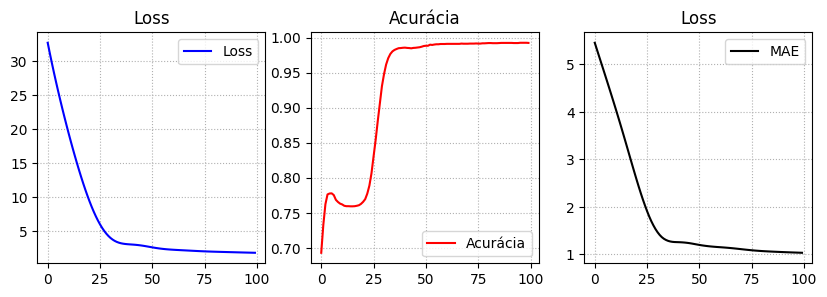

In [116]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs      = axs.flatten()

axs[0].plot(losses, label='Loss', color='b')
axs[0].set_title('Loss')

axs[1].plot(accs, label='Acurácia', color='r')
axs[1].set_title('Acurácia')

axs[2].plot(maes, label='MAE', color='k')
axs[2].set_title('Loss')


for i in range(3):
  axs[i].grid(True, linestyle=':')
  axs[i].legend()

Exercício - Redes Siamesas (Entrega)

O objetivo desse laboratório e implementar uma rede siamesa para identificar similaridade entre imagens. Redes siamesas são um tipo de arquitetura de rede neural que consiste em duas (ou mais) sub-redes idênticas, que compartilham os mesmos pesos e parâmetros. Elas são usadas para aprender representações comparáveis entre duas entradas, processando ambas de forma independente e comparando suas saídas. A arquitetura é frequentemente usada em tarefas de comparação ou verificação de similaridade, como reconhecimento facial, verificação de assinaturas, ou para encontrar pares de imagens ou sequências de texto que sejam semanticamente similares. O objetivo é aprender uma função de distância que identifique se dois inputs são semelhantes ou dissimilares, com a ajuda de funções de perda como a Contrastive Loss ou Triplet Loss.

Para isso, vamos utilizar o dataset fashion mnist, onde a ideia é fornecer duas imagens para um modelo base, em seguida comparar a distância euclidiana dos vetores de saída de cada modelo. 

Trabalho 3
- gerar dataset para gerar pares de imagens
- treina rede siamesa para reconhecer imagens similares e diferentes
- implementar a parte distribuída

- treinamento distribuido necessita backpropagation e ficará mto complicado...treine offline e depois q tiver os pesos salve-os